In [123]:
import numpy as np
from scipy.integrate import quad, nquad
import matplotlib.pyplot as plt
%matplotlib inline

Se harán las siguientes integrales:


Con N = 100,1000,10000


Para 1D:


i) $x^{-3}$, x -> [1,10]

ii) $x^{-\frac{1}{2}}$, x -> [1,10]


Para 3D:


iii) $\frac{1}{x} + y + z^2$, x -> [1,10]; y -> [0,2]; z -> [0,2]

Graficar E vs N y $S^2$ vs N

In [129]:
F1 = lambda x: x**(-3)

F2 = lambda x: 1/np.sqrt(x)

F3 = lambda x,y,z: 1/x + y + z**2

N = [100,1000,10000]

def montecarlo_1D(F,n,a,b,I):
    E = []
    S2 = []
    err = []
    
    for i in n:
        x = np.random.rand(i,1)*(b-a) + a
        
        e = np.sum(F(x))/i * (b-a)
        E.append(e)
       
        err.append(np.abs(e - I))
        
        S2.append(np.sum(F(x)**2)/i *(b-a)**2 - e**2)
    
    return np.array(E), np.array(S2), np.array(err)
    
def montecarlo_3D(F,n,A,B,I):
    E = []
    S2 = []
    err = []
    
    A = np.array(A).reshape(1,3)
    B = np.array(B).reshape(1,3)
    
    for i in n:
        r = np.random.rand(i,3)*(B-A) + A
        e = np.sum(F(r[:,0],r[:,1],r[:,2]))/i * np.prod(B-A)
        
        E.append(e)
        err.append(np.abs(e - I))
        S2.append(np.sum(F(r[:,0],r[:,1],r[:,2])**2)/i * np.prod(B-A) - e**2)
    
    return E, S2, err

# Ecuación: $x^{-3}$

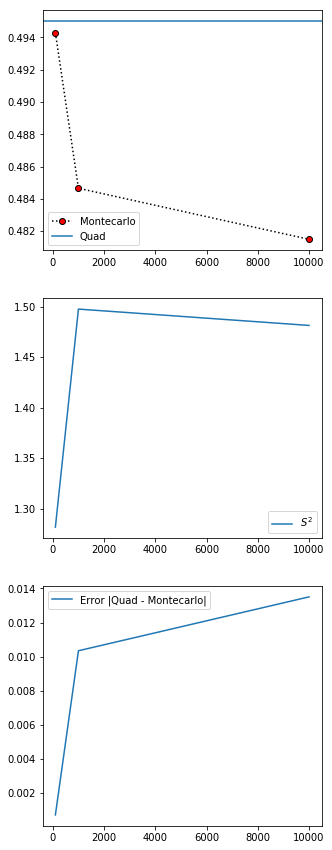

In [141]:
I_quad,_ = quad(F1,1,10) #Integral "real"
E_F1, S2_F1, err_F1 = montecarlo_1D(F1,N,1,10,I_quad)

fig, axes = plt.subplots(3,1, figsize = (5,15))

axes[0].plot(N, E_F1, ls = ":", marker = 'o', color = 'black', mfc = "red", label = "Montecarlo")
axes[0].axhline(y = I_quad, label = "Quad")

axes[1].plot(N, S2_F1, label = r"$S^2$")
axes[2].plot(N, err_F1, label = "Error |Quad - Montecarlo|")

for i in axes: i.legend()


# Ecuación: $x^{-\frac{1}{2}}$

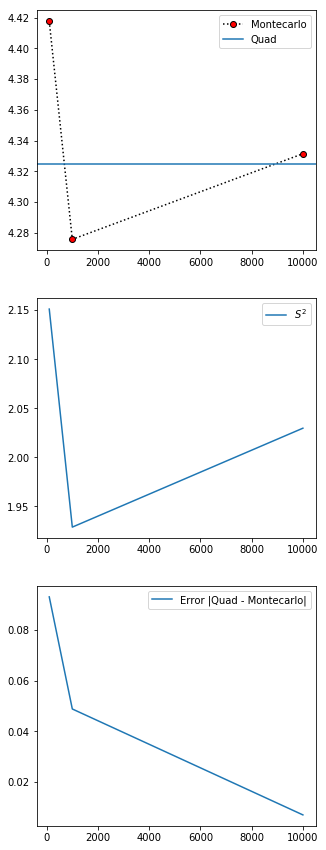

In [140]:
I_quad,_ = quad(F2,1,10)
E_F2, S2_F2,err_F2 = montecarlo_1D(F2,N,1,10,I_quad)


fig, axes = plt.subplots(3,1, figsize = (5,15))

axes[0].plot(N, E_F2, ls = ":", marker = 'o', color = 'black', mfc = "red", label = "Montecarlo")
axes[0].axhline(y = I_quad, label = "Quad")

axes[1].plot(N, S2_F2, label = r"$S^2$")
axes[2].plot(N, err_F2, label = "Error |Quad - Montecarlo|")

for i in axes: i.legend()


# Ecuación:  $\frac{1}{x} + y + z^2$

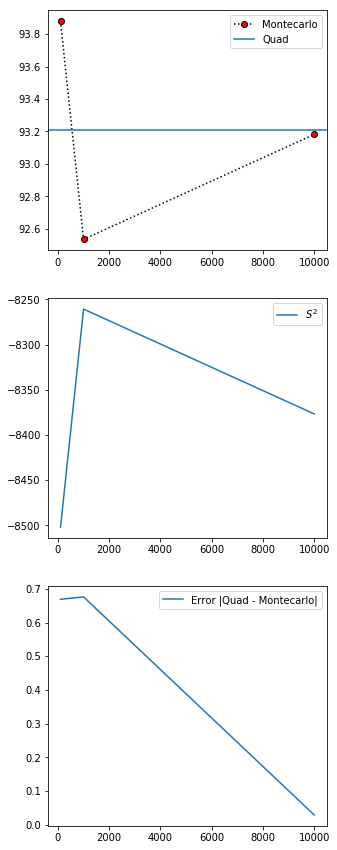

In [139]:
I_quad,_ = nquad(F3, [[1, 10], [0,2],[0,2]])
E_F3, S2_F3,err_F3 = montecarlo_3D(F3,N,[1,0,0],[10,2,2],I_quad)


fig, axes = plt.subplots(3,1, figsize = (5,15))

axes[0].plot(N, E_F3, ls = ":", marker = 'o', color = 'black', mfc = "red", label = "Montecarlo")
axes[0].axhline(y = I_quad, label = "Quad")

axes[1].plot(N, S2_F3, label = r"$S^2$")
axes[2].plot(N, err_F3, label = "Error |Quad - Montecarlo|")

for i in axes: i.legend()


# Tarea

implementar el muestreo estratificado y muestreo ponderado

# Método de Metrópolis

Sea $\phi_1$ el valor inicial:

1) Generar (aleatoriamente) un nuevo candidato $\phi'$.


2) Calcular $\Delta S = -ln(p(\phi')/p(\phi_1))$.


3) Si $\Delta S < 0$ escoja $\phi_2 = \phi'$.


4) Si $\Delta S > 0$ acepte un nuevo candidato solo si su probabilidad es $p(\phi')/p(\phi)$, de lo contrario, no se acepta el estado.


5) Repetir.

## Implementación

Implementar Metrópolis y aplicar para el experimento de Rutherford.

$P(\theta) = \frac{1}{\sigma \sqrt{2 \pi}}*e^{\frac{-(\theta-\mu)^2}{2\sigma^2}}$ con $\mu = 0, \sigma = 0.1$

Generar 1000 eventos y graficar $\theta$

In [118]:
P = lambda x,sigma = 0.1, mu = 0: 1/(sigma*np.sqrt(2*np.pi)) * np.exp( -(x - mu)**2/(2*sigma**2) ) 

phi = [np.random.random()]

while len(phi) < 1000:
    phi_p = np.random.random()*(2*np.pi) - np.pi
    DS = -np.log(P(phi_p)/P(phi[-1]))
    
    if DS < 0:
        phi.append(phi_p)
        
    elif DS > 0:
        p = P(phi_p)/P(phi[-1])
        if p > np.random.random():
            phi.append(phi_p)
        
    else:
        continue

phi = np.array(phi)

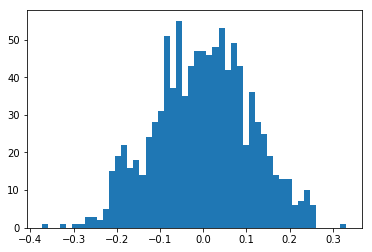

In [142]:
plt.hist(phi, bins = 50);